<a href="https://colab.research.google.com/github/Amitsingh666/DS/blob/main/Credit_Card_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Credit Fraud Detection using Pipeline</h1>


In [8]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #for spliting the data
from sklearn.preprocessing import MaxAbsScaler,QuantileTransformer # for scaling the data
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [9]:
import os

# List all files inside the dataset folder
print(os.listdir("/kaggle/input/creditcardfraud"))

['creditcard.csv']


In [10]:
path = "/kaggle/input/creditcardfraud/creditcard.csv"
cr_data = pd.read_csv(path)


cr_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
cr_data.shape

(284807, 31)

<h2> Checking Null Value <h2>

In [12]:
cr_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [13]:
cr_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
cr_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
cr_data['Class'].value_counts()

,count
Class,
0,284315
1,492


<h3>We are Checking for Duplicate Value</h3>

In [16]:
cr_data.duplicated().sum()

np.int64(1081)

There are 1081 duplicated row. So we are going to drop it.

In [17]:
cr_data.drop_duplicates(inplace=True)
print("Shape of data frame : ",cr_data.shape)

Shape of data frame :  (283726, 31)


<Axes: xlabel='Time', ylabel='Amount'>

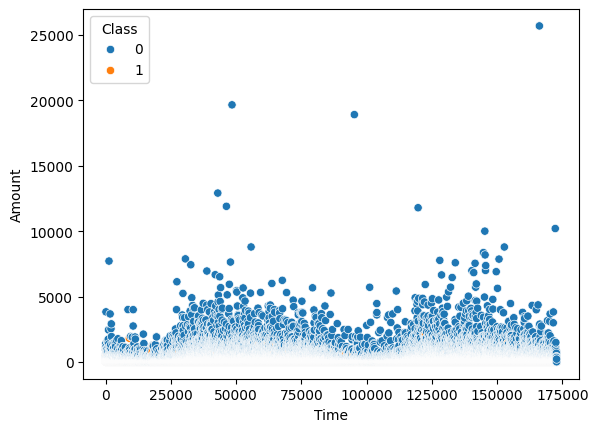

In [18]:
sns.scatterplot(x="Time", y="Amount", hue="Class", data=cr_data)

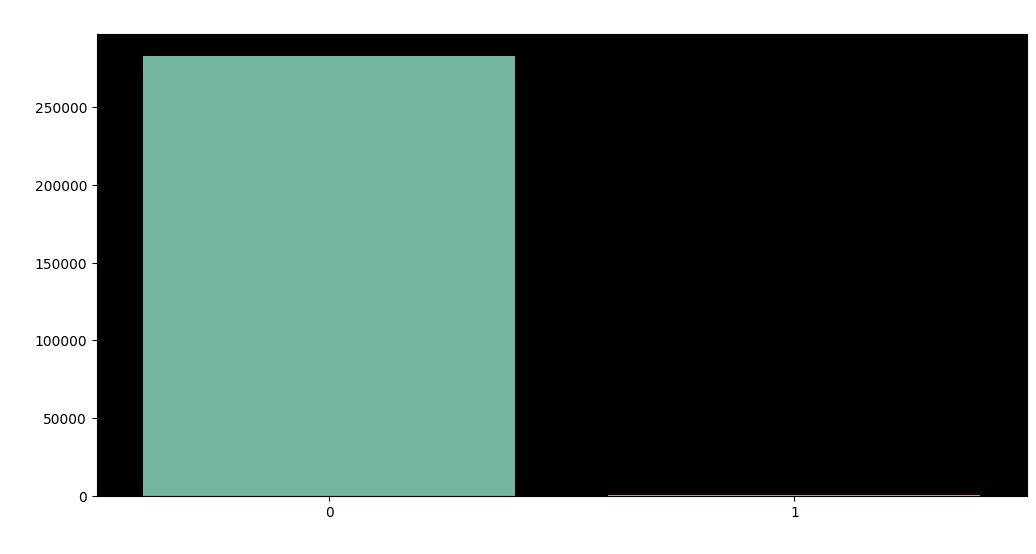

In [19]:
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_facecolor("black")
sns.countplot(x="Class", data=cr_data, hue="Class", palette="Set2", legend=False)

plt.title("Class Distribution: Fraud vs Non-Fraud", color="white", fontsize=16)
plt.xlabel("Class", color="white", fontsize=14)
plt.ylabel("Count", color="white", fontsize=14)

plt.show()

Here 0 is valid transaction and 1 is fraudulent Transaction

# Feature Engineering

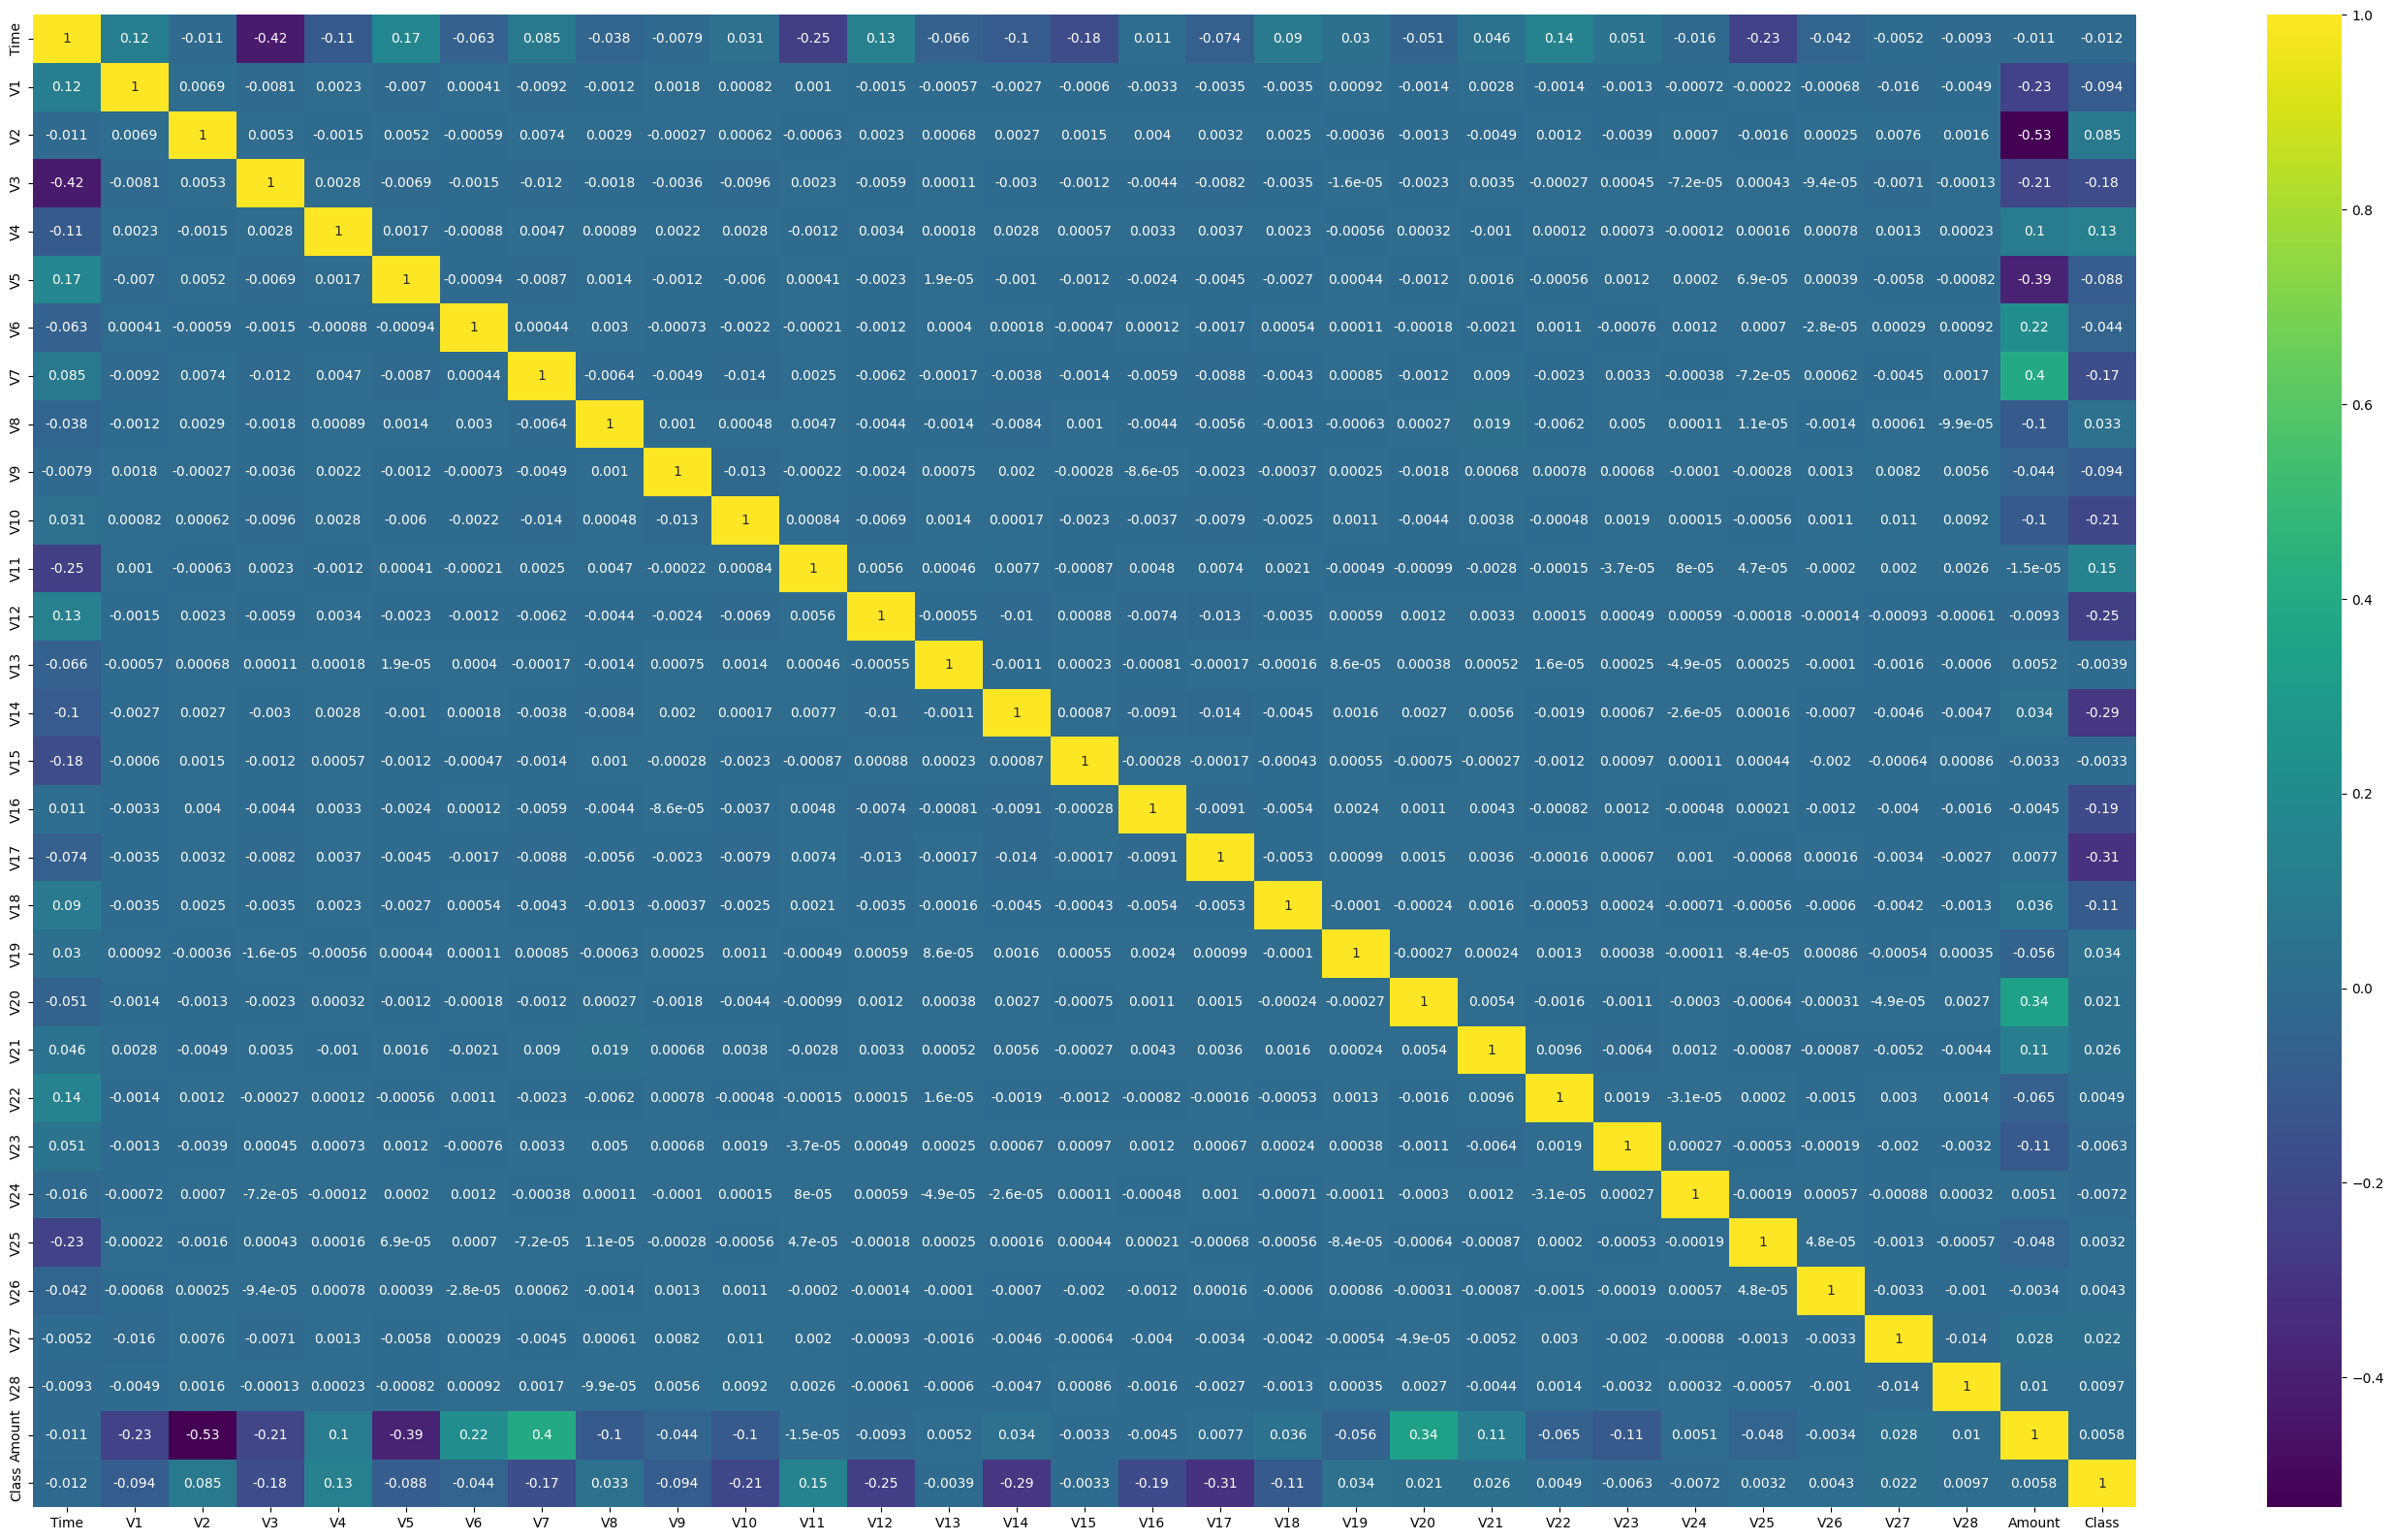

In [20]:
plt.figure(figsize=(35,20))
sns.heatmap(cr_data.corr(),annot=True,cmap="viridis")
plt.show()

In [21]:
X=cr_data.drop(['Class'], axis=1)
y= cr_data['Class']

In [22]:
#finding correlation with target feature
var = cr_data[cr_data.columns[1:]].corr()['Class'][:]
var.sort_values(ascending=True)

,Class
V17,-0.313498
V14,-0.293375
V12,-0.250711
V10,-0.206971
V16,-0.187186
V3,-0.182322
V7,-0.172347
V18,-0.105340
V1,-0.094486
V9,-0.094021


Now, we are soliting the dataset into training and testing set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1, stratify = y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226980, 30), (56746, 30), (226980,), (56746,))

## Handling Target Imbalance using Random Over Sampling (ROS)

### Why the problem?
- The dataset is highly imbalanced:
  - Majority class → Non-fraud (≈99.8%)  
  - Minority class → Fraud (≈0.2%)  
- Without balancing, the model predicts mostly Non-fraud and fails to detect fraud.

### Why Random Over Sampling (ROS)?
- ROS duplicates minority class samples until classes are balanced.  
- This ensures the model sees enough fraud examples to learn meaningful patterns.  
- Keeps all majority data intact (unlike undersampling, which removes data).  

### Advantages
1. Simple and fast to implement  
2. Preserves majority-class information  
3. Balances dataset effectively  

### Disadvantages
1. Risk of overfitting (since data is duplicated)  
2. Less powerful than SMOTE/ADASYN (which create synthetic samples)  

### Why I chose ROS in this project
- Baseline method to quickly balance the dataset  
- Ensures the model gets sufficient fraud cases to train on  
- Keeps all majority-class data without deletion  
- Works well as a starting point before trying advanced methods


In [25]:
X_train, y_train = RandomOverSampler(random_state=63).fit_resample(X_train, y_train)

# Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline


# Define only fast + strong models
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GaussianNB())
    ])
}

# Dictionary to store model results
model_results = {}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Probabilities (for ROC-AUC where available)
    if hasattr(model, "predict_proba"):
        y_proba_test = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba_test)
    else:
        roc_auc = None

    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average="weighted")

    # Save results
    model_results[name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"{name}: Train={train_acc:.4f}, Test={test_acc:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc}")

Logistic Regression: Train=0.9532, Test=0.9795, F1=0.9882, ROC-AUC=0.9644808611173306
Decision Tree: Train=1.0000, Test=0.9991, F1=0.9990, ROC-AUC=0.8313936020082331
Naive Bayes: Train=0.9194, Test=0.9737, F1=0.9852, ROC-AUC=0.9458486820040339


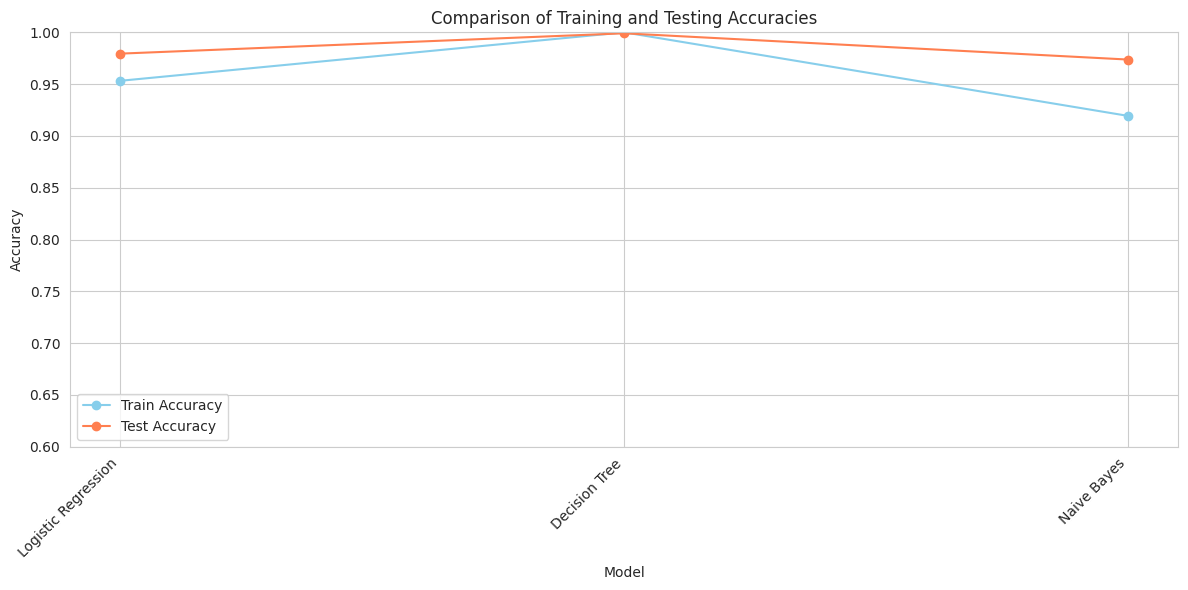

In [27]:
accuracy_df = pd.DataFrame(model_results).T   # transpose so models are rows

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(accuracy_df.index, accuracy_df["Train Accuracy"], marker='o', linestyle='-', color="skyblue", label="Train Accuracy")
plt.plot(accuracy_df.index, accuracy_df["Test Accuracy"], marker='o', linestyle='-', color="coral", label="Test Accuracy")

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Training and Testing Accuracies")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.6, 1.0)  # Set y-axis limits

plt.legend()
plt.tight_layout()
plt.show()
